Part A

Question 1

1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order

In [10]:
P1 = 400 # People who planned to purchase and actually placed an order
P = 2000 # Total number of people
Prob_1 = round(P1/P,2)

print("Joint probability of the people who planned to purchase and actually placed an order:", Prob_1)

Joint probability of the people who planned to purchase and actually placed an order: 0.2


1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that 
people planned to purchase

In [13]:
P1 = 400 # People who planned to purchase and actually placed an order
PP = 500 # Total number of people who planned to purchase
Prob_2 = round(P1/PP,2)

print("Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase:", Prob_2)

Joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase: 0.8


Question 2

In [11]:
import numpy as np
import scipy.stats as stats

In [8]:
n = 10

In [9]:
p = 0.05

In [14]:
from scipy.stats import binom

2.A. Probability that none of the items are defective?

In [24]:
binom.pmf(k=0, n=n, p=p)

0.5987369392383789

2.B. Probability that exactly one of the items is defective?

In [25]:
binom.pmf(k=1, n=n, p=p)

0.3151247048623047

2.C. Probability that two or fewer of the items are defective?

In [22]:
binom.cdf(k=2, n=n, p=p)

0.9884964426207031

2.D. Probability that three or more of the items are defective ?

In [23]:
1 - binom.cdf(k=2, n=n, p=p)

0.01150355737929687

Question 3

3.A. What is Probability that in a given week he will sell some cars?

In [27]:
from scipy.stats import poisson

In [33]:
1 - poisson.pmf(k = 0, mu = 3)

0.950212931632136

3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars?

In [34]:
poisson.pmf(k = 2, mu = 3) + poisson.pmf(k = 3, mu = 3) + poisson.pmf(k = 4, mu = 3)

0.6161149710523164

3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week

In [39]:
import matplotlib.pyplot as plt

In [46]:
cdf = poisson.cdf(np.arange(0,16), mu=3)
cdf = np.round(cdf, 3)

print(cdf)

[0.05  0.199 0.423 0.647 0.815 0.916 0.966 0.988 0.996 0.999 1.    1.
 1.    1.    1.    1.   ]


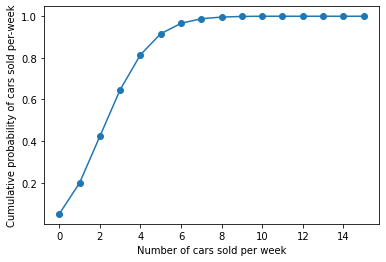

In [47]:
plt.plot(np.arange(0,16), cdf, marker='o')
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative probability of cars sold per-week')

plt.show()

Question 4

4.A. What is the probability that all three orders will be recognised correctly?

In [49]:
binom.pmf(k=3, n=3, p=0.868)

0.653972032

4.B. What is the probability that none of the three orders will be recognised correctly?

In [50]:
binom.pmf(k=0, n=3, p=0.868)

0.0022999680000000003

4.C. What is the probability that at least two of the three orders will be recognised correctly?

In [51]:
binom.pmf(k=2, n=3, p=0.868) + binom.pmf(k=3, n=3, p=0.868)

0.952327936

Question 5

Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of
Applied Statistics to get data driven business solution.

In an online social media campaign, we can use binomial distribution to model the situation where we send ads to 'N' targeted segment of customers and out of them we believe that atleast 'K' customers (K < N) would click the ad. We can determine the probability for the same using binomial distribution since we have only 2 possible outcomes for every customer which is they either click the ad or don't click. Using historical data, we can determine the probability that a customer would click an ad in general which would be the success in this case.

PART B

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Question 1

1. Read the data set, clean the data and prepare final dataset to be used for analysis

In [91]:
Basketball = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Applied Statistics\Basketball.csv')

In [92]:
Basketball.drop(Basketball.index[60], inplace = True) #dropping the row since info is not available for most columns

In [93]:
Basketball.replace("-", 0, inplace = True) #replacing - with 0

In [94]:
Basketball["TeamLaunch"] = Basketball["TeamLaunch"].str[:4] #taking first four digits for TeamLaunch for uniformity

In [95]:
Basketball.isnull().sum() #checking for null values

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [96]:
Basketball.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [98]:
Basketball[["Score", "PlayedGames", "WonGames", "DrawnGames", "LostGames", "BasketScored", "BasketGiven", "TournamentChampion", "Runner-up", "TeamLaunch"]] = Basketball[["Score", "PlayedGames", "WonGames", "DrawnGames", "LostGames", "BasketScored", "BasketGiven", "TournamentChampion", "Runner-up", "TeamLaunch"]].apply(pd.to_numeric)

In [99]:
Basketball.dtypes

Team                   object
Tournament              int64
Score                   int64
PlayedGames             int64
WonGames                int64
DrawnGames              int64
LostGames               int64
BasketScored            int64
BasketGiven             int64
TournamentChampion      int64
Runner-up               int64
TeamLaunch              int64
HighestPositionHeld     int64
dtype: object

Question 2

Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on 
recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a 
detailed performance report using this data

Solution: Since it's given that some of the older teams are already in contract with competitors, we will do the analysis for top 10 teams so that Company X can choose among those top 10 teams that are still available

In [112]:
Basketball.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,60.0,24.383333,26.884620,1.0,4.00,12.0,39.00,86.0
Score,60.0,916.450000,1138.342899,14.0,104.25,395.5,1360.50,4385.0
PlayedGames,60.0,810.100000,877.465393,30.0,115.50,424.5,1345.50,2762.0
WonGames,60.0,309.033333,408.481395,5.0,34.75,124.0,432.75,1647.0
DrawnGames,60.0,192.083333,201.985508,4.0,26.25,98.5,331.50,633.0
LostGames,60.0,308.816667,294.508639,15.0,62.75,197.5,563.50,1070.0
BasketScored,60.0,1159.350000,1512.063948,34.0,154.50,444.0,1669.75,5947.0
BasketGiven,60.0,1159.233333,1163.946914,55.0,236.00,632.5,2001.25,3889.0
TournamentChampion,60.0,1.450000,5.515540,0.0,0.00,0.0,0.00,33.0
Runner-up,60.0,1.433333,4.574679,0.0,0.00,0.0,0.00,25.0


Plotting pairplot and heatmap for certain features that have high chance of association based on the feature description

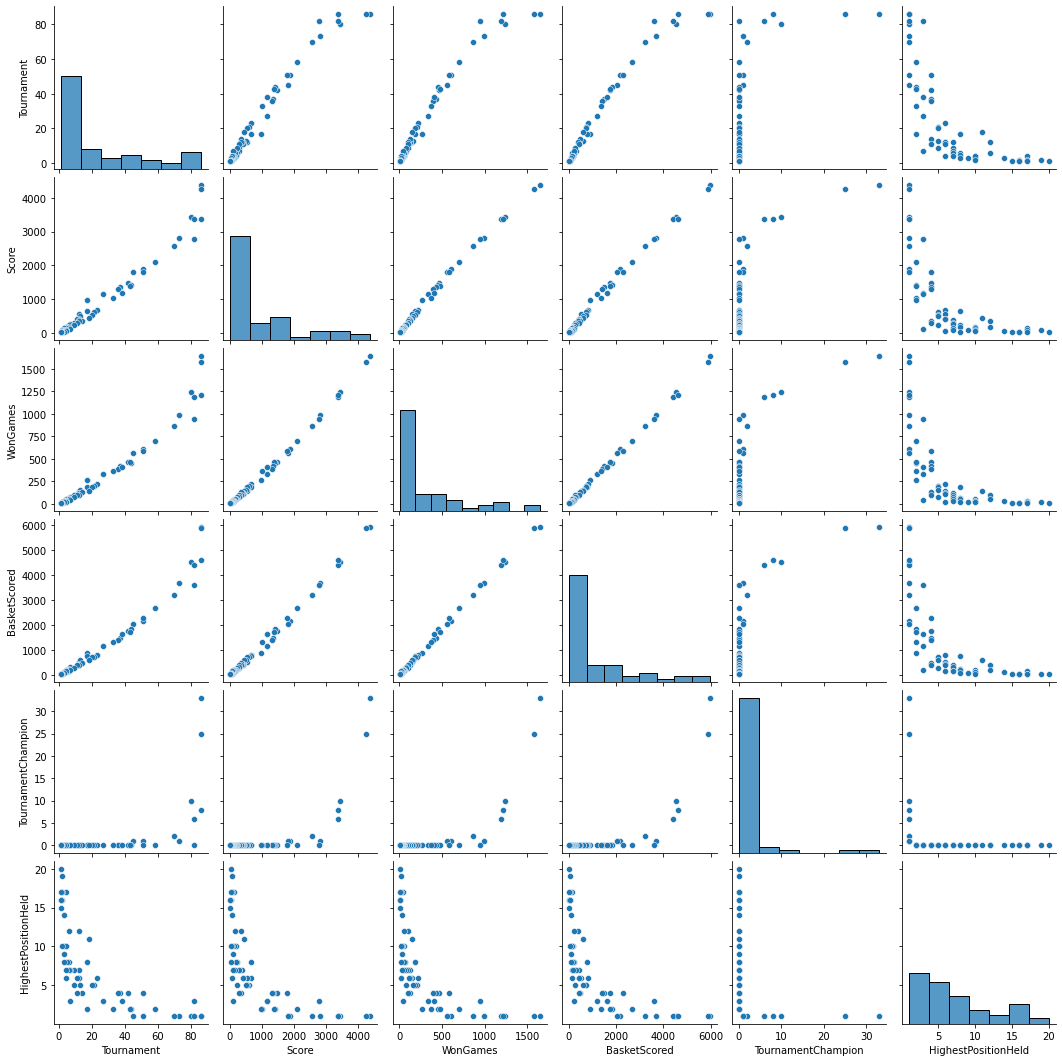

In [113]:
sns.pairplot(Basketball[["Tournament", "Score", "WonGames", "BasketScored", "TournamentChampion", "HighestPositionHeld"]])
plt.show()

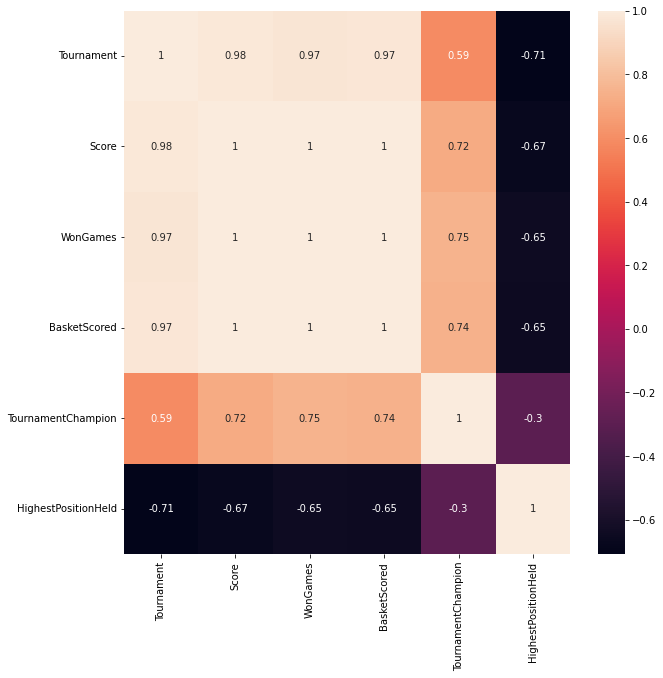

In [115]:
fig = plt.subplots(figsize=(10, 10))   
sns.heatmap(Basketball[["Tournament", "Score", "WonGames", "BasketScored", "TournamentChampion", "HighestPositionHeld"]].corr(), annot=True) 
plt.show()

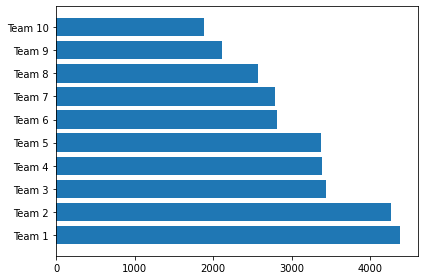

In [101]:
Top_10_Scores_Team = Basketball.sort_values(by="Score", ascending=False)[:10][["Team", "Score"]]
plt.barh(Top_10_Scores_Team["Team"], Top_10_Scores_Team["Score"])
plt.tight_layout()
plt.show()

In [102]:
Basketball[Basketball["Score"]==Basketball["Score"].max()]["Team"] #team with highest score

0    Team 1
Name: Team, dtype: object

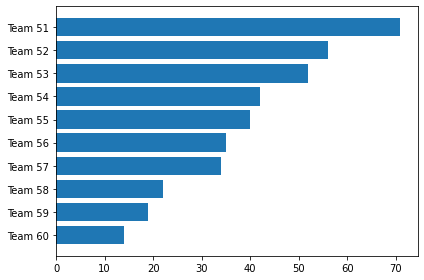

In [103]:
Bottom_10_Scores_Team = Basketball.sort_values(by="Score", ascending=True)[:10][["Team", "Score"]]
plt.barh(Bottom_10_Scores_Team["Team"], Bottom_10_Scores_Team["Score"])
plt.tight_layout()
plt.show()

In [104]:
Basketball[Basketball["Score"]==Basketball["Score"].min()]["Team"] #team with lowest score

59    Team 60
Name: Team, dtype: object

In [105]:
Top_10_Year_Team = Basketball.sort_values(by="TeamLaunch", ascending=True)[:10][["Team", "TeamLaunch"]]
Top_10_Year_Team # top 10 oldest teams

,Team,TeamLaunch
0,Team 1,1929
51,Team 52,1929
13,Team 14,1929
7,Team 8,1929
6,Team 7,1929
44,Team 45,1929
4,Team 5,1929
2,Team 3,1929
1,Team 2,1929
53,Team 54,1929


In [107]:
Basketball[Basketball["TeamLaunch"]==Basketball["TeamLaunch"].min()]["Team"] #oldest team

0      Team 1
1      Team 2
2      Team 3
4      Team 5
6      Team 7
7      Team 8
13    Team 14
44    Team 45
51    Team 52
53    Team 54
Name: Team, dtype: object

In [106]:
Bottom_10_Year_Team = Basketball.sort_values(by="TeamLaunch", ascending=False)[:10][["Team", "TeamLaunch"]]
Bottom_10_Year_Team # top 10 newest teams

,Team,TeamLaunch
55,Team 56,2016
43,Team 44,2014
56,Team 57,2009
36,Team 37,2007
24,Team 25,2004
42,Team 43,1999
20,Team 21,1998
47,Team 48,1996
48,Team 49,1995
38,Team 39,1994


In [88]:
Basketball[Basketball["TeamLaunch"]==Basketball["TeamLaunch"].max()]["Team"] #newest team

55    Team 56
Name: Team, dtype: object

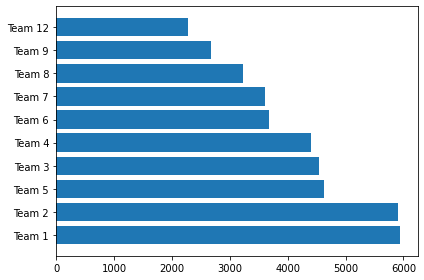

In [108]:
Top_10_Goals_Team = Basketball.sort_values(by="BasketScored", ascending=False)[:10][["Team", "BasketScored"]]
plt.barh(Top_10_Goals_Team["Team"], Top_10_Goals_Team["BasketScored"])
plt.tight_layout()
plt.show()

In [109]:
Basketball[Basketball["BasketScored"]==Basketball["BasketScored"].max()]["Team"] #team with highest goals

0    Team 1
Name: Team, dtype: object

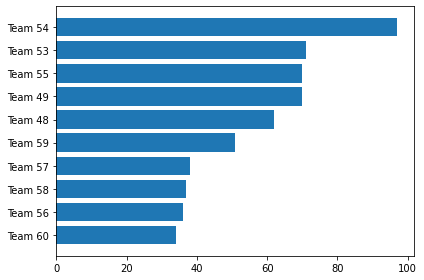

In [110]:
Bottom_10_Goals_Team = Basketball.sort_values(by="BasketScored", ascending=True)[:10][["Team", "BasketScored"]]
plt.barh(Bottom_10_Goals_Team["Team"], Bottom_10_Goals_Team["BasketScored"])
plt.tight_layout()
plt.show()

In [111]:
Basketball[Basketball["BasketScored"]==Basketball["BasketScored"].min()]["Team"] #team with lowest goals

59    Team 60
Name: Team, dtype: object

In [70]:
Basketball["Win %"] = round(Basketball["WonGames"] / Basketball["PlayedGames"] * 100,2) 

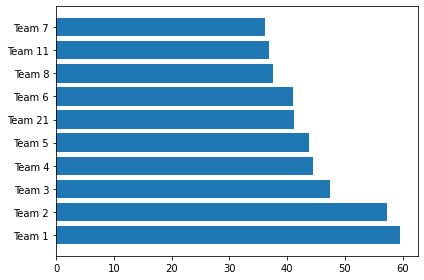

In [76]:
Top_10_Win_Team = Basketball.sort_values(by="Win %", ascending=False)[:10][["Team", "Win %"]]
plt.barh(Top_10_Win_Team["Team"], Top_10_Win_Team["Win %"])
plt.tight_layout()
plt.show()

In [87]:
Basketball[Basketball["Win %"]==Basketball["Win %"].max()]["Team"] #team with highest win %

0    Team 1
Name: Team, dtype: object

In [118]:
Basketball["Lose %"] = round(Basketball["LostGames"] / Basketball["PlayedGames"] * 100,2) 

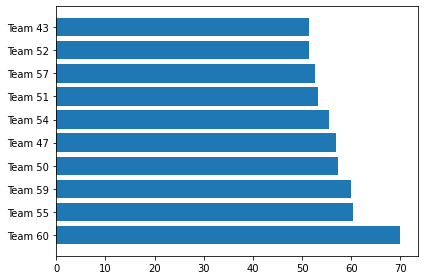

In [128]:
Top_10_Lose_Team = Basketball.sort_values(by="Lose %", ascending=False)[:10][["Team", "Lose %"]]
plt.barh(Top_10_Lose_Team["Team"], Top_10_Lose_Team["Lose %"])
plt.tight_layout()
plt.show()

In [121]:
Basketball[Basketball["Lose %"]==Basketball["Lose %"].min()]["Team"] #team with lowest lose %

0    Team 1
Name: Team, dtype: object

In [123]:
Basketball["Scoring Ratio"] = round(Basketball["BasketScored"] / Basketball["BasketGiven"],2) 

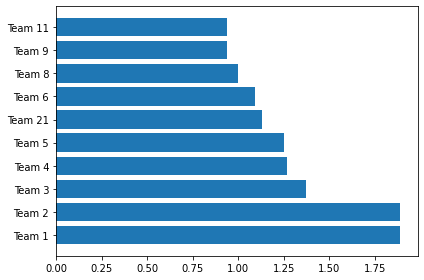

In [124]:
Top_10_Ratio_Team = Basketball.sort_values(by="Scoring Ratio", ascending=False)[:10][["Team", "Scoring Ratio"]]
plt.barh(Top_10_Ratio_Team["Team"], Top_10_Ratio_Team["Scoring Ratio"])
plt.tight_layout()
plt.show()

In [125]:
Basketball[Basketball["Scoring Ratio"]==Basketball["Scoring Ratio"].max()]["Team"] #team with high scoring ratio is a high performing team

0    Team 1
1    Team 2
Name: Team, dtype: object

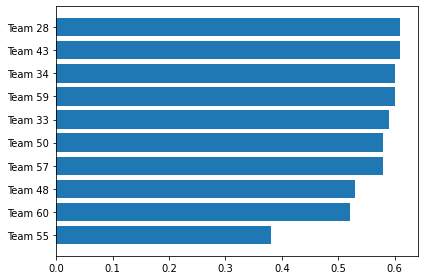

In [126]:
Bottom_10_Ratio_Team = Basketball.sort_values(by="Scoring Ratio", ascending=True)[:10][["Team", "Scoring Ratio"]]
plt.barh(Bottom_10_Ratio_Team["Team"], Bottom_10_Ratio_Team["Scoring Ratio"])
plt.tight_layout()
plt.show()

In [127]:
Basketball[Basketball["Scoring Ratio"]==Basketball["Scoring Ratio"].min()]["Team"] #team with low scoring ratio is a low performing team

54    Team 55
Name: Team, dtype: object

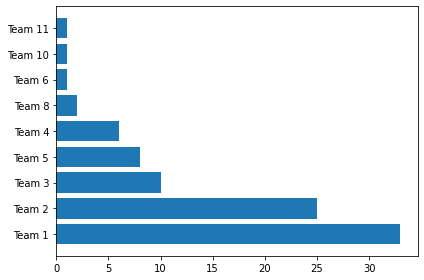

In [134]:
Basketball_1 = Basketball[Basketball["TournamentChampion"] != 0]
Top_10_Champ_Team = Basketball_1.sort_values(by="TournamentChampion", ascending=False)[:10][["Team", "TournamentChampion"]]
plt.barh(Top_10_Champ_Team["Team"], Top_10_Champ_Team["TournamentChampion"])
plt.tight_layout()
plt.show()

In [124]:
Basketball[Basketball["TournamentChampion"]==Basketball["TournamentChampion"].max()]["Team"] #team with max number of times tournament champion

0    Team 1
Name: Team, dtype: object

In [141]:
Basketball[Basketball["HighestPositionHeld"]==Basketball["HighestPositionHeld"].min()]["Team"] #team with the highest position

0      Team 1
1      Team 2
2      Team 3
3      Team 4
4      Team 5
5      Team 6
7      Team 8
9     Team 10
10    Team 11
Name: Team, dtype: object

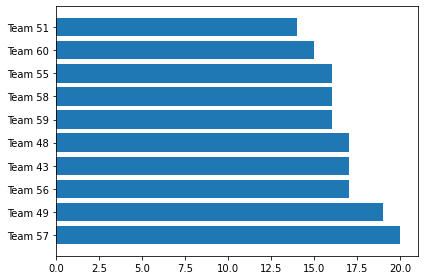

In [142]:
Bottom_10_HighPos_Team = Basketball.sort_values(by="HighestPositionHeld", ascending=False)[:10][["Team", "HighestPositionHeld"]]
plt.barh(Bottom_10_HighPos_Team["Team"], Bottom_10_HighPos_Team["HighestPositionHeld"])
plt.tight_layout()
plt.show()

In [143]:
Basketball[Basketball["HighestPositionHeld"]==Basketball["HighestPositionHeld"].max()]["Team"] #team with the lowest position

56    Team 57
Name: Team, dtype: object

Conclusion:
Out of all the teams, I would strongly recommend Company X to go with any of these teams that are available for a new contract - Team 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 21

These are the lowest performing teams that I wouldn't recommend - Team 28, 33, 34, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60

Question 3

Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the 
data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point

Quality:
Overall quality of data is good. However, following are the improvements,
1. TeamLaunch is not in uniform format. Better to stick with one year i.e, starting year for analysis purpose.
2. Last data point (i.e. Team 61) doesn't add any value since most of the column's are blank. This data point could have been removed.
3. Many missing values in TournamentChampion and Runner-up columns. They can try to collect data as much as possible to improve quality.
4. If there is any team where it's no longer active, those data points can be removed since we don't want to make any decisions based on that team.

Quantity:
Quantity of data is quite less. If we need to do any predictive/prescriptive analytics then we would need more volume of data. If it's going to be only descriptive analytics then the quantity is fine to just summarize the data using descriptive statistics and charts to derive insights.

Variety:
The data as a whole is semi-structured since the TeamLaunch is not in uniform format and there are some missing values. It's better to have structured data in future to have better insights. Also, the data types are uniform with all fields being int data type except the Team Name.

Velocity:
Velocity of data should be less since not a significant number of teams would get added every year. If there are more teams getting added then they can possibly host the data in a database like SQL server to better manage the data.

Veracity:
Since there are only few data points, the data should be accurate enough. However to ensure best practices are followed, regular data quality audits can be performed that includes accuracy, timeliness, completeness, relevancy and reliability.

Part C

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Question 1

1. Read the CSV file

In [2]:
CompanyX_EU = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Applied Statistics\CompanyX_EU.csv')

In [3]:
CompanyX_EU.head(5)

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


Question 2

2.A. Check the datatypes of each attribute

In [4]:
CompanyX_EU.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

2.B. Check for null values in the attributes

In [5]:
CompanyX_EU.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

Question 3

3.A. Drop the null values

In [6]:
CompanyX_EU.dropna(inplace=True)

In [7]:
CompanyX_EU.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

3.B. Convert the ‘Funding’ features to a numerical value

In [8]:
CompanyX_EU.loc[:,'Funds_in_million'] = CompanyX_EU['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

In [9]:
CompanyX_EU.head(5)

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


3.C. Plot box plot for funds in million

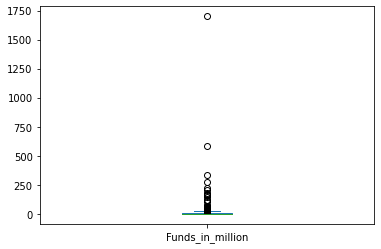

In [10]:
#sns.boxplot(y=CompanyX_EU["Funds_in_million"]);
#plt.show()
CompanyX_EU["Funds_in_million"].plot(kind='box');

3.D. Check the number of outliers greater than the upper fence

In [11]:
arr_funds = np.array(CompanyX_EU["Funds_in_million"])

q1 = np.quantile(arr_funds, 0.25)
q3 = np.quantile(arr_funds, 0.75)
iqr = q3-q1
 
upper_bound = q3+(1.5*iqr)
len(arr_funds[(arr_funds > upper_bound)])

60

3.E. Check frequency of the OperatingState features classes

In [12]:
CompanyX_EU["OperatingState"].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

Question 4

4.A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down

Yes, there is a significant difference. Please refer to 4.B and 4.C for the analysis.

4.B. Write the null hypothesis and alternative hypothesis

Null: Mean funds raised by operating companies = Mean funds raised by closed companies

Alternate: Mean funds raised by operating companies != Mean funds raised by closed companies

4.C. Test for significance and conclusion

In [13]:
stats.ttest_ind(a=CompanyX_EU[CompanyX_EU["OperatingState"] == "Operating"]["Funds_in_million"], b=CompanyX_EU[CompanyX_EU["OperatingState"] == "Closed"]["Funds_in_million"], equal_var=False)

Ttest_indResult(statistic=2.6727214329249227, pvalue=0.007898898722704632)

Conclusion: since p-value < 0.05, we reject null hypothesis and conclude that there is a significant difference between Funds raised by companies that are still operating vs companies that closed down

4.D. Make a copy of the original data frame

In [16]:
CompanyX_EU_Copy = CompanyX_EU.copy() 
CompanyX_EU_Copy.head(5)

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


4.E. Check frequency distribution of Result variables

In [17]:
CompanyX_EU["Result"].value_counts()

Contestant         312
Finalist            65
Audience choice     25
Winner              25
Runner up           19
Name: Result, dtype: int64

4.F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [18]:
print("Percentage of winners that are still operating:", round(CompanyX_EU[CompanyX_EU["Result"]=="Winner"]["OperatingState"].value_counts()["Operating"] / len(CompanyX_EU)*100,2),"%")
print("Percentage of contestants that are still operating:", round(CompanyX_EU[CompanyX_EU["Result"]=="Contestant"]["OperatingState"].value_counts()["Operating"] / len(CompanyX_EU)*100,2),"%")

Percentage of winners that are still operating: 4.04 %
Percentage of contestants that are still operating: 47.98 %


4.G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants

Null: Proportion of companies that are operating between winners and contestants are equal

Alternate: Proportion of companies that are operating between winners and contestants are not equal

4.H. Test for significance and conclusion

In [19]:
n_prop = np.array([CompanyX_EU.groupby("OperatingState")["Result"].value_counts()[("Operating", "Contestant")],CompanyX_EU.groupby("OperatingState")["Result"].value_counts()[("Operating", "Winner")]])
n_rows = np.array(CompanyX_EU.groupby("OperatingState")["Result"].value_counts().sum())
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=n_prop, nobs=n_rows, alternative="two-sided")

(14.959688081728588, 1.3465568386354265e-50)

Conclusion: since p-value < 0.05 then we reject null hypothesis i.e, proportion of companies that are operating between winners and contestants are not equal

4.I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards

In [20]:
res = []
arr = list(CompanyX_EU["Event"].unique())
arr
for i in arr:
    if "Disrupt" in i:
        res.append(i)
res1 = []
for i in res:
    for j in i.split():
        if j.isdigit():
            res1.append(eval(j))
res2 = []
for i in res1:
    if i>=2013:
        res2.append(True)
    else:
        res2.append(False)
final = np.array(res)
list(final[np.array(res2)])

['Disrupt NYC 2013',
 'Disrupt NY 2016',
 'Disrupt SF 2015',
 'Disrupt London 2016',
 'Disrupt NYC 2014',
 'Disrupt EU 2013',
 'Disrupt SF 2014',
 'Disrupt SF 2013',
 'Disrupt NY 2015',
 'Disrupt SF 2016',
 'Disrupt London 2015',
 'Disrupt EU 2014']

THANK YOU!